<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/Tracking_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=0dd3bbd4ef914a0a395dbeee1ce3d232af5b658cc69e668e9047f75aa0e083e9
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
startday = '2021-01-01'
today = pd.to_datetime('now').date()
print(today)

2021-01-14


In [27]:
# Get stock data from Yahoo Finance

def GetStockData(tickerSymbol, start, end):
  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start=start, end=end)

  #see your data
  return tickerDf[['Close']]

In [46]:
sp = GetStockData('^GSPC', startday, str(today))
bit = GetStockData('BTC-USD', startday, str(today))
tsla = GetStockData('TSLA', startday, str(today))
tenyr = GetStockData('^TNX', startday, str(today))
tsx = GetStockData('^GSPTSE', startday, str(today))
vix = GetStockData('^VIX', startday, str(today))

In [30]:
def GetTrend(x,y):
  coef = np.polyfit(x,y,1)
  poly1d_fn = np.poly1d(coef) 
  return poly1d_fn(x)

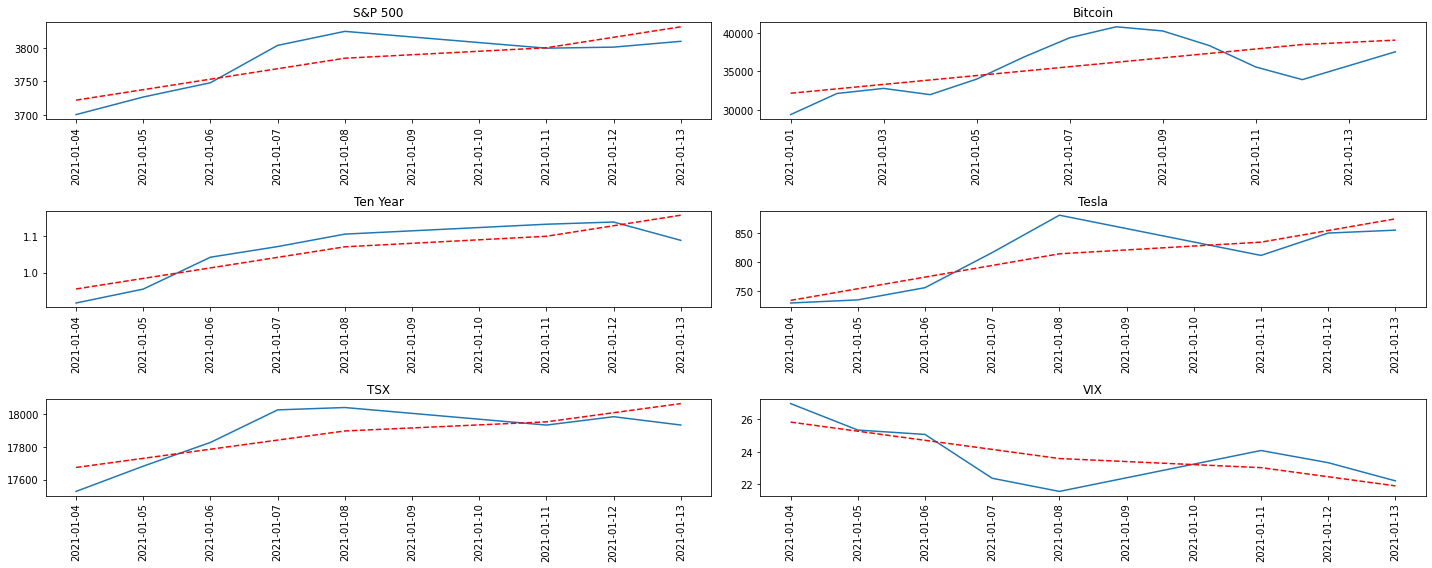

In [50]:
plt.subplots(2,2,figsize=(20,8))

plt.subplot(3,2,1)
plt.title('S&P 500')
plt.plot(sp.index.values, sp.values)
plt.plot(sp.index.values, GetTrend(np.arange(0,len(sp)), sp.values.reshape(-1)), 'r--')
plt.xticks(rotation=90)

plt.subplot(3,2,2)
plt.title('Bitcoin')
plt.plot(bit.index.values, bit.values)
plt.plot(bit.index.values, GetTrend(np.arange(0,len(bit)), bit.values.reshape(-1)), 'r--')
plt.xticks(rotation=90)

plt.subplot(3,2,3)
plt.title('Ten Year')
plt.plot(tenyr.index.values, tenyr.values)
plt.plot(tenyr.index.values, GetTrend(np.arange(0,len(tenyr)), tenyr.values.reshape(-1)), 'r--')
plt.xticks(rotation=90)

plt.subplot(3,2,4)
plt.title('Tesla')
plt.plot(tsla.index.values, tsla.values)
plt.plot(tsla.index.values, GetTrend(np.arange(0,len(tsla)), tsla.values.reshape(-1)), 'r--')
plt.xticks(rotation=90)

plt.subplot(3,2,5)
plt.title('TSX')
plt.plot(tsx.index.values, tsx.values)
plt.plot(tsx.index.values, GetTrend(np.arange(0,len(tsx)), tsx.values.reshape(-1)), 'r--')
plt.xticks(rotation=90)

plt.subplot(3,2,6)
plt.title('VIX')
plt.plot(vix.index.values, vix.values)
plt.plot(vix.index.values, GetTrend(np.arange(0,len(vix)), vix.values.reshape(-1)), 'r--')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(str(today)+'.png')